Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)

Complete attribute documentation:
      1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     20 ekgmo (month of exercise ECG reading)
     21 ekgday(day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used
     76 name: last name of patient  (I replaced this with the dummy string "name")

Baseline Mode

In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in d:\data_science\healthcare_project\heart_diseases_prediction\venv\lib\site-packages (5.22.0)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [4]:
# for classification evaloution matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,precision_score,mean_squared_error,r2_score,roc_auc_score

In [5]:
data = pd.read_csv("Heart_Disease_Prediction.csv")
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [14]:
data.shape

(270, 14)

In [15]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [17]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [18]:
data.shape

(270, 14)

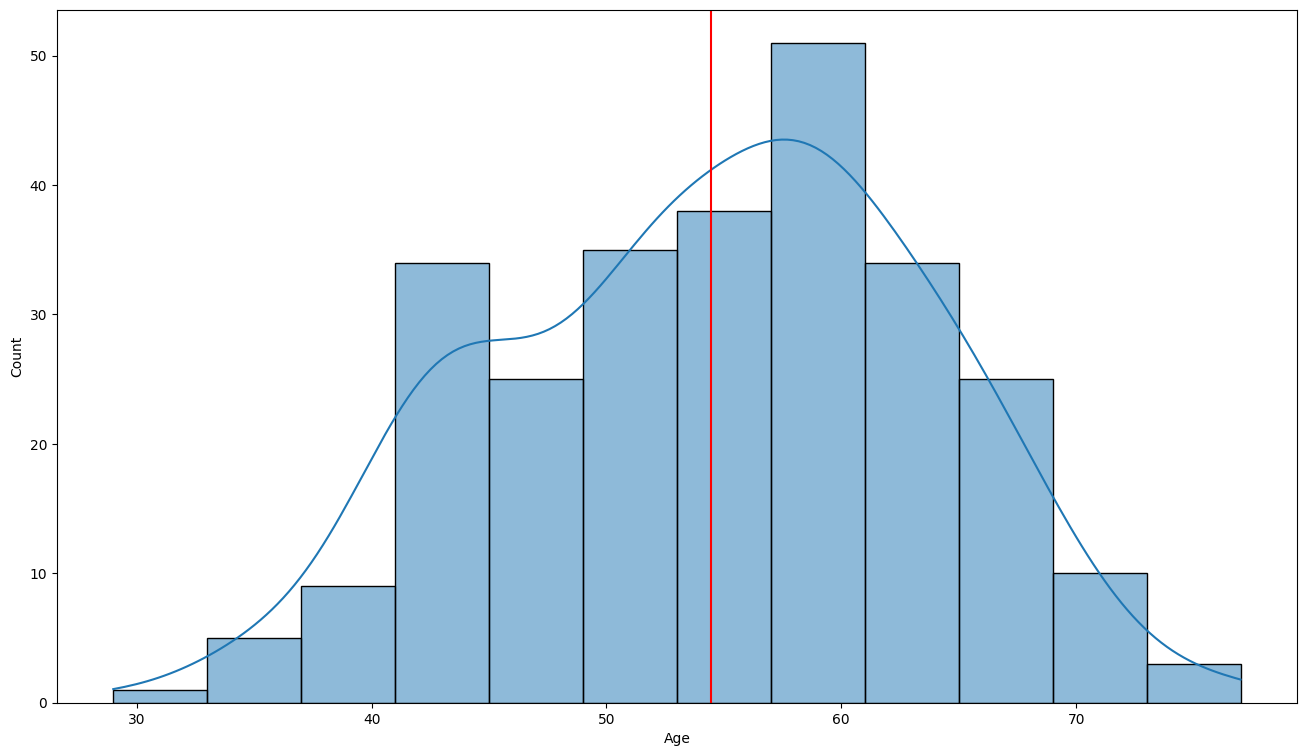

In [19]:
plt.figure(figsize=(16, 9))
sns.histplot(data['Age'], kde= True)
plt.axvline(data['Age'].mean(), color='r')

In [20]:
data['Age'].mean()

np.float64(54.43333333333333)

In [21]:
print("1 : Male, 0 : Female")
data['Sex'].value_counts()

1 : Male, 0 : Female


Sex
1    183
0     87
Name: count, dtype: int64

In [22]:
# calculate percentage of male and female in sex column
male = data['Sex'].value_counts()[1]
female = data['Sex'].value_counts()[0]
total = male + female

# calculate percentage
male_percentage = (male/total) * 100
female_percentage = (female/total) * 100

# print the result
print(f"Male Percentage in data: {male_percentage:.2f}%")
print(f"Female Percentage in data: {female_percentage:.2f}%")

# difference
difference_peercentage = ((male - female)/ female) * 100
print(f"Males are {difference_peercentage:.2f}% more than females in the data.")

Male Percentage in data: 67.78%
Female Percentage in data: 32.22%
Males are 110.34% more than females in the data.


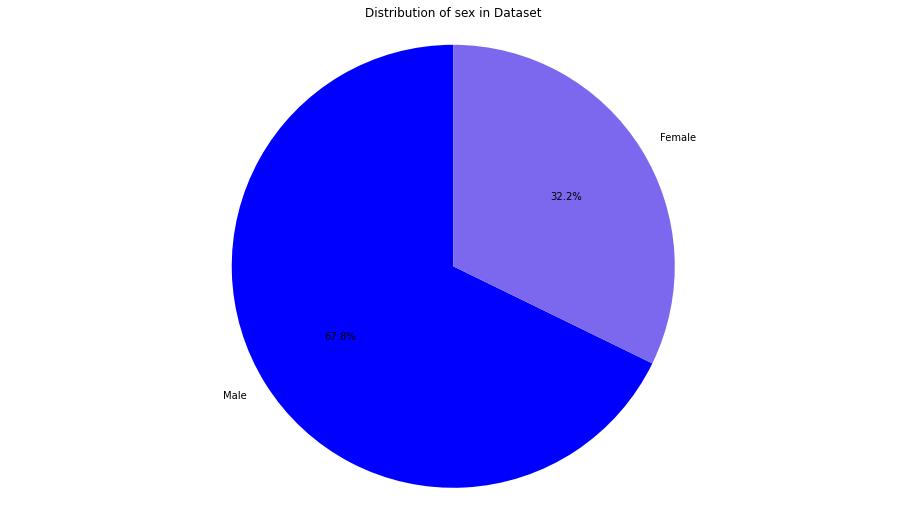

In [13]:
# Pie chart
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['blue','MediumSlateBlue']

fig1, ax1 = plt.subplots(figsize=(16, 9))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of sex in Dataset')
plt.show()

In [14]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [15]:
print('''1: Typical angina,
2: Atypical angina,
3: Non-anginal pain,
4: Asymptomatic''')
data['Chest pain type'].value_counts()

1: Typical angina,
2: Atypical angina,
3: Non-anginal pain,
4: Asymptomatic


4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [16]:
px.histogram(data_frame=data, x="Age", color="Chest pain type")

In [12]:
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

In [13]:
print("0: Absence, 1: Presence")
data['Heart Disease'].value_counts()

0: Absence, 1: Presence


0    150
1    120
Name: Heart Disease, dtype: int64

In [6]:
# split data into X and y
X = data.drop(['Heart Disease'], axis=1)
y = data['Heart Disease']

In [7]:
# split data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
pickle.dump(scaler,open("scaling.pkl","wb"))

In [23]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    #'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'XG Boost': XGBClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

In [23]:
results = {}
best_model = None
best_accuracy = 0.0
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': cr
    }
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
# Retrieve the best model
print("BestModel:", best_model)

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n" + "="*60 + "\n")

BestModel: LogisticRegression(random_state=42)
Model: Random Forest
Accuracy: 0.7592592592592593
Confusion Matrix:
[[28  5]
 [ 8 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.72      0.62      0.67        21

    accuracy                           0.76        54
   macro avg       0.75      0.73      0.74        54
weighted avg       0.76      0.76      0.76        54



Model: Gradient Boosting
Accuracy: 0.7592592592592593
Confusion Matrix:
[[28  5]
 [ 8 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.72      0.62      0.67        21

    accuracy                           0.76        54
   macro avg       0.75      0.73      0.74        54
weighted avg       0.76      0.76      0.76        54



Model: Support Vector Machine
Accuracy: 0.8888888888888888
Confusion Ma

In [24]:
ensemble_model = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')
ensemble_model.fit(X_test, y_test)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(random_state=42)),
                             ('Logistic Regression',
                              LogisticRegression(random_state=42)),
                             ('K-Nearest Neighbors', KNeighborsClassifier()),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('Ada Boost', AdaBoostClassifier(random...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=N

In [26]:
accuracy_score(y_test, ensemble_model.predict(X_test))

1.0

In [28]:
confusion_matrix(y_test, ensemble_model.predict(X_test))

array([[33,  0],
       [ 0, 21]], dtype=int64)

In [30]:
print(classification_report(y_test,ensemble_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        21

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [33]:
print(f"ROC AUC: {roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:,1]):.4f}")

ROC AUC: 1.0000


In [24]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
accuracy_score(y_test, nb_y_pred)

0.9074074074074074

In [34]:
#inserting the model into the pickle file
pickle.dump(ensemble_model, open('heart_disease_ensemble_model.pkl', 'wb'))

In [35]:
with open('heart_disease_ensemble_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [36]:

# Function to get user input and convert to the appropriate format
def get_user_data():
    print("Enter the following details:")
    
    age = int(input("Age: "))
    sex = int(input("Sex (Male=1, Female=0): "))
    cp = int(input("Chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic): "))
    bp = float(input("Resting blood pressure: "))
    cholesterol = float(input("Cholesterol: "))
    fbs = int(input("Fasting blood sugar > 120 mg/dl (True=1, False=0): "))
    ekg_results = int(input("Resting electrocardiographic results (0=normal, 1=lv hypertrophy, 2=st-t abnormality): "))
    max_hr = float(input("Maximum heart rate achieved: "))
    exercise_angina = int(input("Exercise induced angina (True=1, False=0): "))
    st_depression = float(input("ST depression induced by exercise relative to rest: "))
    slope_of_st = int(input("Slope of the peak exercise ST segment (0=upsloping, 1=flat, 2=downsloping): "))
    num_vessels_fluoro = float(input("Number of major vessels (0-3) colored by fluoroscopy: "))
    thallium = int(input("Thalassemia (3=normal, 6=fixed defect, 7=reversable defect): "))
    
    # Arrange the data as per the model's expected format
    person_data_values = [
        age, sex, cp, bp, cholesterol, fbs, ekg_results, max_hr,
        exercise_angina, st_depression, slope_of_st, num_vessels_fluoro, thallium
    ]

    return np.array(person_data_values).reshape(1, -1)

# Get user data
person_data_array = get_user_data()

# Predict using the model
prediction = model.predict(person_data_array)[0]

# Interpret the prediction
if prediction == 0:
    print("The model predicts that the person does not have heart disease.")
else:
    print(f"The model predicts that the person has heart disease")


Enter the following details:
The model predicts that the person has heart disease


In [38]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [28]:
model.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [35]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [28]:
data['BP'].value_counts()

120    34
130    31
140    30
110    17
150    17
160    11
125    10
138     9
112     9
128     9
118     7
132     6
135     6
108     6
124     5
145     5
134     4
100     4
152     4
180     3
136     3
115     3
105     3
126     3
122     3
142     3
94      2
102     2
178     2
170     2
104     1
200     1
155     1
101     1
129     1
123     1
192     1
117     1
158     1
146     1
156     1
165     1
174     1
144     1
106     1
148     1
172     1
Name: BP, dtype: int64

<AxesSubplot:>

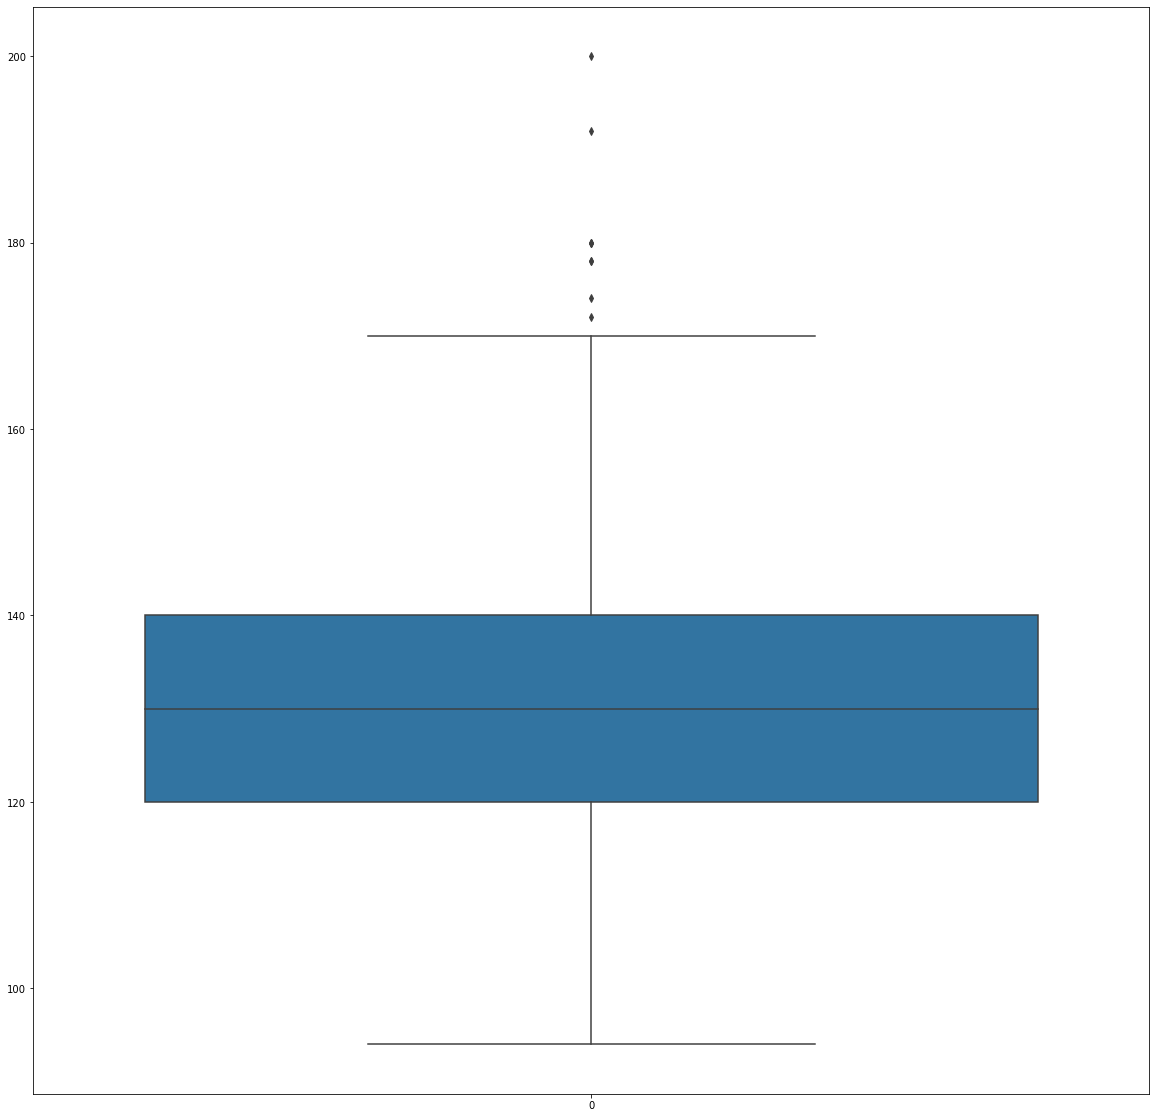

In [40]:
plt.figure(figsize=(20,20))
sns.boxplot(data=data['BP'])